In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
X_train=np.random.uniform(0,10,5)
Y_train=X_train*np.exp(X_train)


In [58]:
sigma_range=np.linspace(1e-3,1e3,100)
l_range=np.linspace(1e-3,1e3,100)

In [59]:

def cross_validation(train_x,train_y,index,sigma,leng):
    size=len(train_x)-1
    
    K=np.zeros((size,size))
    K_star=np.zeros((size,1))
    K_star_star=np.zeros((1,1))
    
    curr_train_x=[]
    curr_train_y=[]
    
    for i in range(len(train_x)):
        if(i!=index):
            curr_train_x.append(train_x[i])
            curr_train_y.append(train_y[i])
            
    curr_train_y=np.reshape(curr_train_y,(size,1))
    

    for l in range(size):
        for m in range(size):
            K[l][m]=(sigma**2)*np.exp(-1*(l2_norm(curr_train_x[l],curr_train_x[m]))/(2*(leng**2)))

        K_star[l][0]=(sigma**2)*np.exp(-1*(l2_norm(curr_train_x[l],train_x[index]))/(2*(leng**2)))
            
    K_star_star=sigma**2
    
    K_inv=np.linalg.pinv(K)
        
    mu_prediction=np.matmul(np.matmul(K_star.T,K_inv),curr_train_y)
    error=(train_y[index]-mu_prediction[0][0])**2

    return(error)
                
def get_pred(train_x,train_y,sigma,leng,point):
    size=len(train_x)
    
    K=np.zeros((size,size))
    K_star=np.zeros((size,1))
    K_star_star=np.zeros((1,1))
    
    curr_train_x=train_x
    curr_train_y=train_y
            
    curr_train_y=np.reshape(curr_train_y,(size,1))
    

    for l in range(size):
        for m in range(size):
            K[l][m]=(sigma**2)*np.exp(-1*(l2_norm(curr_train_x[l],curr_train_x[m]))/(2*(leng**2)))

        K_star[l][0]=(sigma**2)*np.exp(-1*(l2_norm(curr_train_x[l],point))/(2*(leng**2)))
            
    K_star_star=sigma**2
    
    K_inv=np.linalg.pinv(K)
        
    mu_prediction=np.matmul(np.matmul(K_star.T,K_inv),curr_train_y)
    sigma_pred=K_star_star+np.matmul(np.matmul(K_star.T,K_inv),K_star)
    
    return(mu_prediction[0][0],sigma_pred[0][0])

def l2_norm(xi,xj):
    return(abs((xi-xj)**2))


In [60]:
optimal_sigma=-1
optimal_l=-1
min_error=1e15

for i in sigma_range:
    for j in l_range:
        mean_error=0
        for left_out in range(len(X_train)):
            curr_error=cross_validation(X_train,Y_train,left_out,i,j)
            mean_error+=curr_error
            
        mean_error/=5
        if(mean_error<min_error):
            min_error=mean_error
            optimal_sigma=i
            optimal_l=j

print(optimal_sigma)
print(optimal_l)



848.485
363.637


In [61]:
print(min_error)

827293433.1000408


In [62]:
X_test=np.random.uniform(0,10,50)
Y_test=X_test*np.exp(X_test)

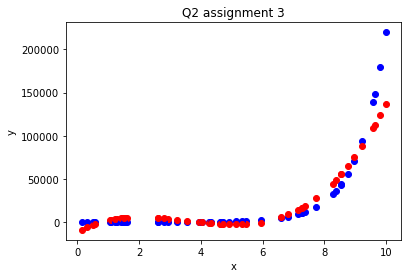

In [63]:
X_test=np.reshape(X_test,(50,1))
Y_test=np.reshape(Y_test,(50,1))

Y_pred_mu=[]
Y_pred_var=[]
for i in X_test:
    vari=get_pred(X_train,Y_train,optimal_sigma,optimal_l,i)
    Y_pred_mu.append(vari[0])
    Y_pred_var.append(vari[1])

for i in range(len(X_test)):
    plt.scatter(X_test[i],Y_test[i],c='b',label='actual data')
    plt.scatter(X_test[i],Y_pred_mu[i],c='r',label='Prediction')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Q2 assignment 3')
plt.show()

In [48]:
print(get_pred([-1,0,1],[1,3,5],1,1,1))

(4.999999999999999, 2.0)
